# LiveGraphing using Basic Tau Hybrid Solver

### Imports

In [1]:
import sys
import os
import numpy
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../../')))
import gillespy2.core.gillespySolver
import gillespy2
from gillespy2.core.gillespyError import SolverError, DirectoryError, BuildError, ExecutionError
from gillespy2.solvers.numpy.basic_tau_hybrid_solver import BasicTauHybridSolver

### Model Instantiation

Model must include rates, species, and reactions

In [2]:
import gillespy2
class VilarOscillator(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="VilarOscillator")
            
            #parameters
            alpha_a = gillespy2.Parameter(name='alpha_a', expression= 50.0)
            alpha_a_prime = gillespy2.Parameter(name='alpha_a_prime', expression= 500.0)
            alpha_r = gillespy2.Parameter(name='alpha_r', expression = 0.01)
            alpha_r_prime = gillespy2.Parameter(name='alpha_r_prime', expression = 50.0)
            beta_a = gillespy2.Parameter(name='beta_a', expression= 50.0)
            beta_r = gillespy2.Parameter(name='beta_r', expression= 5.0)
            delta_ma = gillespy2.Parameter(name='delta_ma', expression = 10.0)
            delta_mr = gillespy2.Parameter(name='delta_mr', expression = 0.5)
            delta_a = gillespy2.Parameter(name='delta_a', expression= 1.0)
            delta_r = gillespy2.Parameter(name='delta_r', expression= 0.2)
            gamma_a = gillespy2.Parameter(name='gamma_a', expression= 1.0)
            gamma_r = gillespy2.Parameter(name='gamma_r', expression= 1.0)
            gamma_c = gillespy2.Parameter(name='gamma_c', expression= 2.0)
            Theta_a = gillespy2.Parameter(name='Theta_a', expression= 50.0)
            Theta_r = gillespy2.Parameter(name='Theta_r', expression= 100.0)
        
            self.add_parameter([alpha_a,alpha_a_prime,alpha_r, alpha_r_prime,beta_a,beta_r,delta_ma,delta_mr,
                               delta_a,delta_r,gamma_a,gamma_r,gamma_c,Theta_a,Theta_r])
            
            #Species
            Da = gillespy2.Species(name='Da', initial_value=1)
            Da_prime = gillespy2.Species(name='Da_prime', initial_value=0)
            Ma = gillespy2.Species(name='Ma', initial_value=0)
            Dr = gillespy2.Species(name='Dr', initial_value=1)
            Dr_prime = gillespy2.Species(name='Dr_prime', initial_value=0)
            Mr = gillespy2.Species(name='Mr',initial_value=0)
            C = gillespy2.Species(name='C',initial_value=10)
            A = gillespy2.Species(name='A',initial_value=10)
            R = gillespy2.Species(name='R',initial_value=10)
            
            self.add_species([Da,Da_prime,Ma,Dr,Dr_prime,Mr,C,A,R])
            
            #reactions
            s_Da = gillespy2.Reaction(name="s_Da",reactants={Da_prime:1}, products={Da:1},rate=Theta_a)
            s_Da_prime = gillespy2.Reaction(name="s_Da_prime",reactants={Da:1,A:1}, products={Da_prime:1},rate=gamma_a)
            s_Dr = gillespy2.Reaction(name="s_Dr",reactants={Dr_prime:1}, products={Dr:1},rate=Theta_r)
            s_Dr_prime = gillespy2.Reaction(name="s_Dr_prime",reactants={Dr:1,A:1}, products={Dr_prime:1},rate=gamma_r)
            s_Ma1 = gillespy2.Reaction(name="s_Ma1",reactants={Da_prime:1},products={Da_prime:1,Ma:1},rate=alpha_a_prime)
            s_Ma2 = gillespy2.Reaction(name="s_Ma2",reactants={Da:1},products={Da:1,Ma:1},rate=alpha_a)
            a_Ma = gillespy2.Reaction(name="a_Ma",reactants={Ma:1},products={},rate=delta_ma)
            s_A1 = gillespy2.Reaction(name="s_A1",reactants={Ma:1},products={A:1,Ma:1},rate=beta_a)
            s_A2 = gillespy2.Reaction(name="S_A2",reactants={Da_prime:1},products={Da_prime:1,A:1},rate=Theta_a)
            s_A3 = gillespy2.Reaction(name="S_A3",reactants={Dr_prime:1},products={Dr_prime:1,A:1},rate=Theta_a)
            a_A = gillespy2.Reaction(name="a_A",reactants={A:1},products={},rate=gamma_c)
            s_C = gillespy2.Reaction(name="s_C",reactants={A:1,R:1},products={C:1},rate=gamma_c)
            S_Mr1 = gillespy2.Reaction(name="S_Mr1",reactants={Dr_prime:1},products={Dr_prime:1,Mr:1},rate=alpha_r_prime)
            S_Mr2 = gillespy2.Reaction(name="S_Mr2",reactants={Dr:1},products={Dr:1,Mr:1},rate=alpha_r)
            a_Mr = gillespy2.Reaction(name="a_Mr",reactants={Mr:1},products={},rate=delta_mr)
            s_R1 = gillespy2.Reaction(name="s_R1",reactants={Mr:1},products={Mr:1,R:1},rate=beta_r)
            a_R = gillespy2.Reaction(name="a_R",reactants={R:1},products={},rate=delta_r)
            s_r2 = gillespy2.Reaction(name="s_r2",reactants={C:1},products={R:1},rate=delta_a)
            
 
            self.add_reaction([s_Da,s_Da_prime,s_Dr,s_Dr_prime,s_Ma1,s_Ma2,a_Ma,s_A1,s_A2,s_A3,a_A,s_C,
                              S_Mr1,S_Mr2,a_Mr,s_R1,a_R,s_r2])
    
            self.timespan(numpy.linspace(0,200,201))

In [3]:
model = VilarOscillator()

### Run Model and plot
model.run includes the timeout argument for ending a simulation early. Additionally, the display_interval and display_type arguments may be used for returning feedback while the simulation is running. Display_interval accepts a float value while display_type accepts "graph", "text", and "progress". When using display_type = "graph", a display_interval of atleast 2 is recommended. 

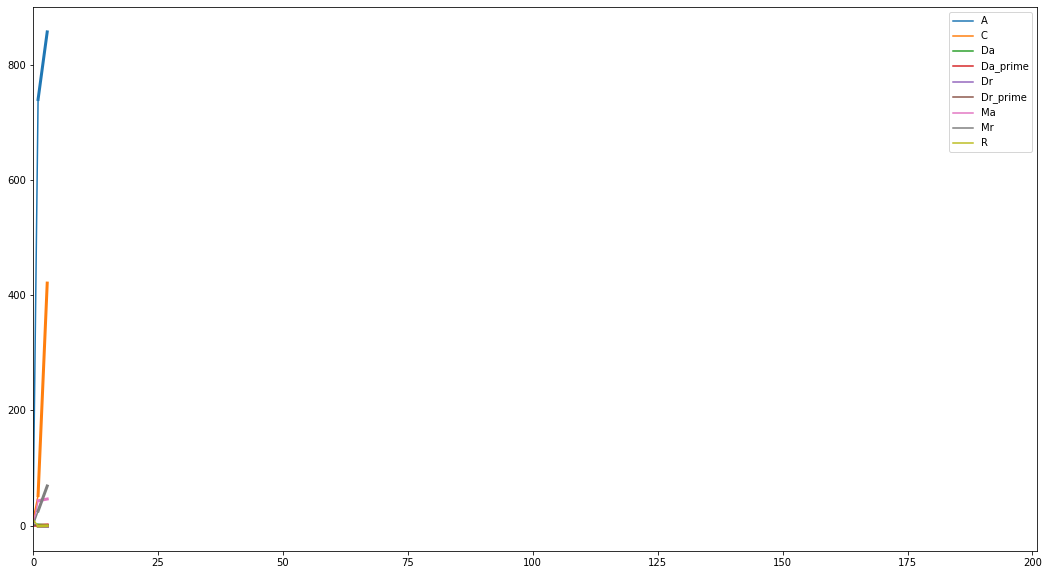

2020-01-30 12:38:36,877 - root - WARNING - GillesPy2 simulation exceeded timeout.


CPU times: user 42.9 s, sys: 926 ms, total: 43.8 s
Wall time: 45 s


In [6]:
%time results = model.run(solver=BasicTauHybridSolver(), timeout = 45,display_interval = 5, display_type = "graph", show_labels=True)

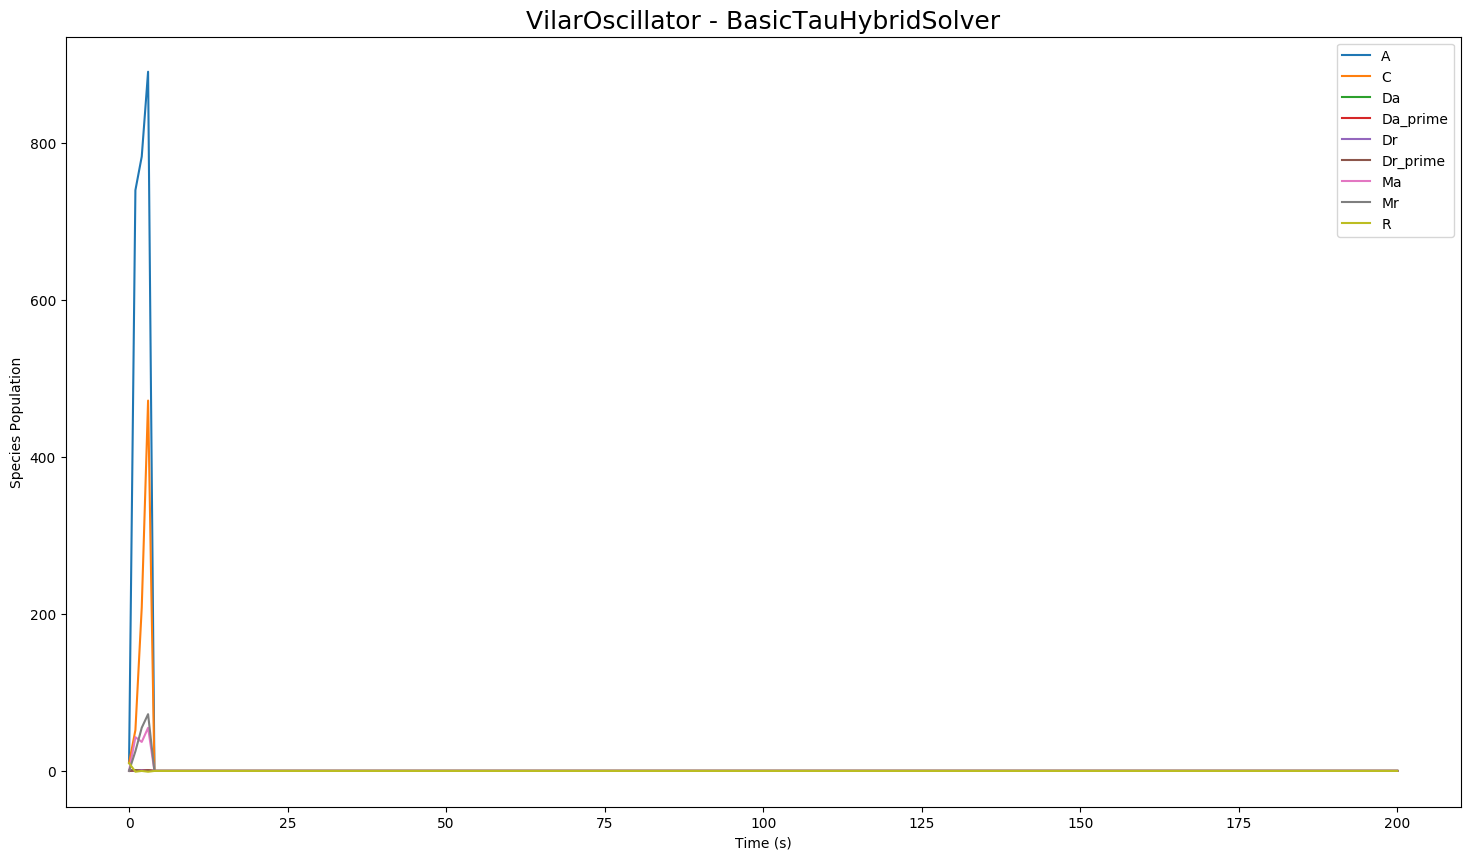

In [9]:
results.plot()

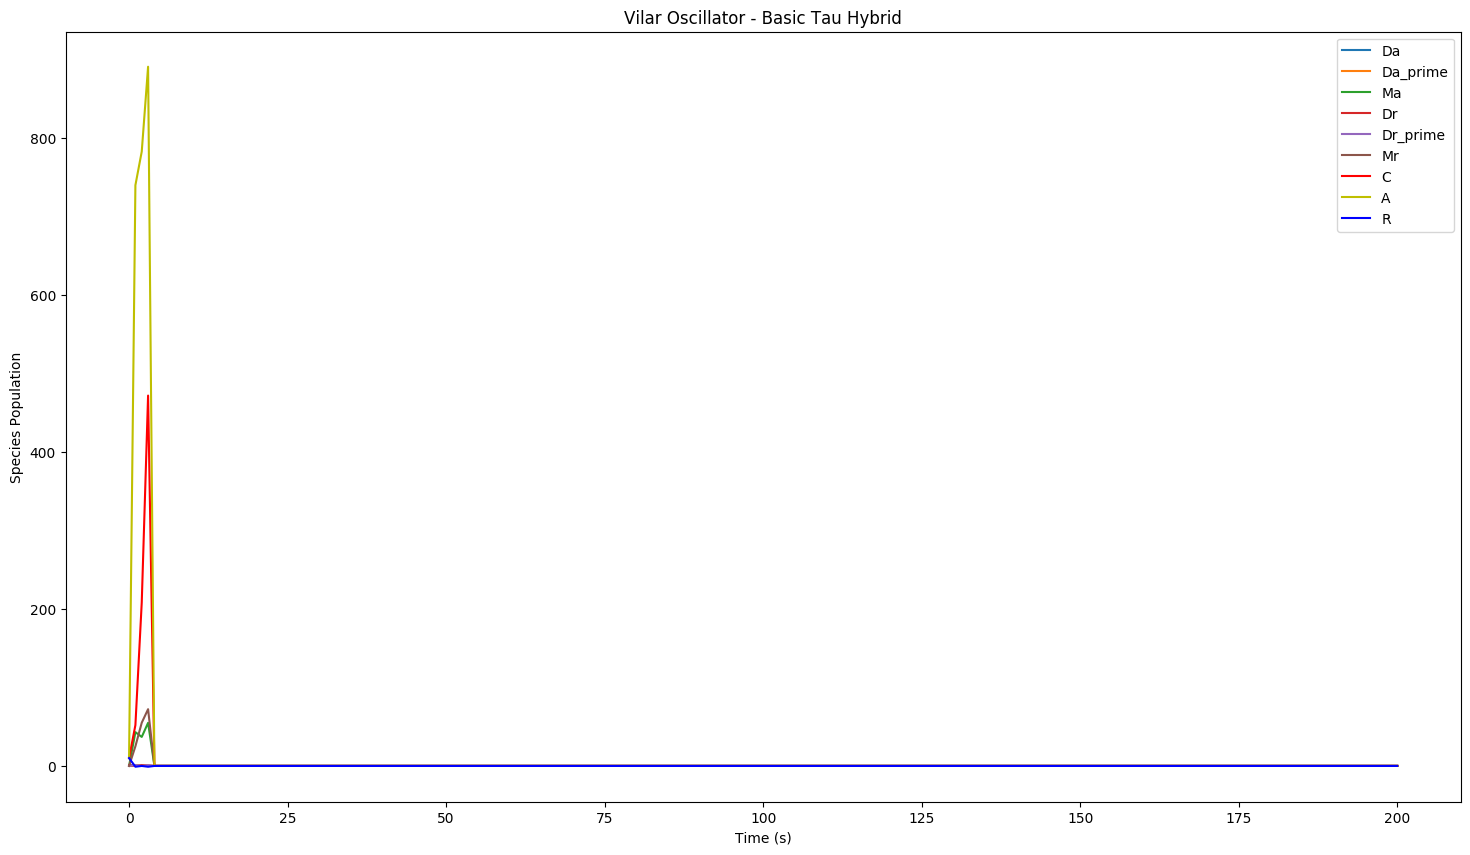

In [8]:
plt.figure(figsize=(18,10))
plt.title("Vilar Oscillator - Basic Tau Hybrid")
plt.xlabel("Time (s)")
plt.ylabel("Species Population")

plt.plot(results['time'],results['Da'], label='Da')
plt.plot(results['time'],results['Da_prime'], label='Da_prime')
plt.plot(results['time'],results['Ma'], label='Ma')
plt.plot(results['time'],results['Dr'], label='Dr')
plt.plot(results['time'],results['Dr_prime'], label='Dr_prime')
plt.plot(results['time'],results['Mr'], label='Mr')
plt.plot(results['time'],results['C'],'r', label='C')
plt.plot(results['time'],results['A'],'y', label='A')
plt.plot(results['time'],results['R'],'b', label='R')

plt.plot([0],[11])
plt.legend(loc='best')

### Plotly can be used to create interactive graphs.
 Plotly graphs can only be viewed in a Jupyter Notebook

In [11]:
results.plotplotly()

<script type="text/javascript">
        window.PlotlyConfig = {MathJaxConfig: 'local'};
        if (window.MathJax) {MathJax.Hub.Config({SVG: {font: "STIX-Web"}});}
        if (typeof require !== 'undefined') {
        require.undef("plotly");
        requirejs.config({
            paths: {
                'plotly': ['https://cdn.plot.ly/plotly-latest.min']
            }
        });
        require(['plotly'], function(Plotly) {
            window._Plotly = Plotly;
        });
        }
        </script>

<div>
        
        
            <div id="b6ce10e7-9b07-41e9-9279-2cb1c34f4668" class="plotly-graph-div" style="height:525px; width:100%;"></div>
            <script type="text/javascript">
                require(["plotly"], function(Plotly) {
                    window.PLOTLYENV=window.PLOTLYENV || {};
                    window.PLOTLYENV.BASE_URL='https://plot.ly';
                    
                if (document.getElementById("b6ce10e7-9b07-41e9-9279-2cb1c34f4668")) {
                    Plotly.newPlot(
                        'b6ce10e7-9b07-41e9-9279-2cb1c34f4668',
                        [{"mode": "lines", "name": "Da", "type": "scatter", "uid": "f230a9c8-bce7-4d6e-ae89-500a011765fe", "x": [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 189.0, 190.0, 191.0, 192.0, 193.0, 194.0, 195.0, 196.0, 197.0, 198.0, 199.0, 200.0], "y": [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"mode": "lines", "name": "Da_prime", "type": "scatter", "uid": "467f8dd8-f151-45c6-9eee-8623837b04f3", "x": [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0